# Аналитика данных
## Методы предобработки данных
### Материалы по теме

### Введение
Предобработка данных — ключевой этап в процессе анализа данных. Почему это важно? Потому что на данном этапе происходит:

1. <u>Очистка данных:</u>
    - **пропуски** в данных могут возникать из-за отсутствия информации, ошибок ввода или системных сбоев. Удаление таких пропусков или их заполнение средним, медианой или модой помогает избежать искажений в анализе;
    - аномальные значения (**ошибки** и **выбросы**) могут исказить результаты анализа. Их обнаружение и исправление с помощью визуализации данных и статистических метрик помогает получить более точные результаты;
2. <u>Трансформация данных:</u>
    - **кодирование категориальных переменных**: категориальные переменные, такие как пол или профессия, необходимо кодировать для использования в алгоритмах машинного обучения;
    - **масштабирование числовых переменных**: приведение числовых переменных к одному диапазону значений улучшает сходимость алгоритмов машинного обучения;
3. <u>Создание новых признаков:</u> **новые признаки**, созданные на основе имеющихся данных, могут улучшить качество анализа и предсказательную способность моделей. Например, можно создать новые признаки с помощью арифметических операций или применения функций к числовым переменным.

### План работы с новыми данными
При работе с новыми данными мы будем стараться следовать такому плану:

1. <u>Изучить данные в целом.</u> На этом этапе мы хотим:
    - убедиться, что данные соответствуют своему описанию (если такое есть);
    - понять, насколько они консистентны и не содержат ли явных ошибок;
    - выяснить, есть ли в них пропуски и какого типа эти пропуски;
    - разобраться, подходят ли они для наших целей;
    - составить список action points для будущего препроцессинга;
2. \[опционально\] <u>Внести первичные правки</u> (если требуется после первого этапа. Спойлер: почти всегда требуется);
3. <u>Изучить переменные по отдельности.</u> Тут мы разбиваем переменные на категории и исследуем распределение каждой из них сообразно ее типу, а также снова составляем список action points, но в контексте отдельных переменных;
4. \[опционально\] <u>Внести дальнейшие правки</u> (если требуется);
5. Тут начинается собственно DA и / или ML.

**Вопрос.** В чем разница между DA (Data Analysis) и ML (Machine Learning)?<br>
Собственно анализ данных фокусируется на описании и построении как можно более правдоподобных описательных моделей, в которых важна интерпретируемость. В то же время машинное обучение также стремиться создавать модели, но концентриуется в первую очередь на предсказательной способности.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

### Описание данных
Мы будем работать с [данными](https://www.kaggle.com/datasets/trisha2094/weatheraus) с платформы Kaggle, содержащими информацию о погоде в Австралии.

У этих данных нет описания, так что нам придется разбираться самим. Начнем:

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Догадки о смысле переменных следующие:

- `Date` - дата (дата наблюдения или записи данных);
- `Location` - местоположение (место, где были собраны данные);
- `MinTemp` - минимальная температура (минимальная температура за период наблюдения);
- `MaxTemp` - максимальная температура (максимальная температура за период наблюдения);
- `Rainfall` - количество осадков (количество осадков за период);
- `Evaporation` - испарение (количество воды, испарившейся за период);
- `Sunshine` - солнечное сияние (количество солнечного света за период);
- `WindGustDir` - направление порыва ветра (направление, откуда дул самый сильный порыв ветра);
- `WindGustSpeed` - скорость порыва ветра (скорость самого сильного порыва ветра);
- `WindDir9am` - направление ветра в 9 утра (направление ветра в указанное время);
- `WindDir3pm` - направление ветра в 3 часа дня (направление ветра в указанное время);
- `WindSpeed9am` - скорость ветра в 9 утра (скорость ветра в указанное время);
- `WindSpeed3pm` - скорость ветра в 3 часа дня (скорость ветра в указанное время);
- `Humidity9am` - влажность в 9 утра (влажность в указанное время);
- `Humidity3pm` - влажность в 3 часа дня (влажность в указанное время);
- `Pressure9am` - давление в 9 утра (атмосферное давление в указанное время);
- `Pressure3pm` - давление в 3 часа дня (атмосферное давление в указанное время);
- `Cloud9am` - облачность в 9 утра (количество облаков в указанное время);
- `Cloud3pm` - облачность в 3 часа дня (количество облаков в указанное время);
- `Temp9am` - температура в 9 утра (температура в указанное время);
- `Temp3pm` - температура в 3 часа дня (температура в указанное время);
- `RainToday` - дождь сегодня (информация о наличии осадков на текущий день);
- `RainTomorrow` - дождь завтра (прогноз наличия осадков на следующий день).

Будем считать, что наша **главная цель** - изучить взаимосвязь между значениями погодных показателей в дату $T$ и наличием либо отсутствием осадков в дату $T+1$ (переменная `RainTomorrow`).

Теперь перейдем к изучению таблицы в целом.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Накидаем первый список action point'ов:

1. `Date` можно перевести в тип datetime;
2. Много пропущенных значений в переменных `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm`;
3. Мало пропущенных значений почти во всех переменных кроме `Date`, `Location`.

Начнем с преобразования переменной `Date`, потом займемся изучением пропущенных значений:

In [5]:
df['DateDt'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DateDt
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008-12-01
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008-12-02
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008-12-03
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008-12-04
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008-12-05


А если хочется красиво вставить на нужное место?

In [ ]:
# df.insert(1, 'DateDt', pd.to_datetime(df['Date'], format='%Y-%m-%d'))

На всякий случай убедимся, что в данных нет дубликатов:

In [6]:
df.duplicated().any()

np.False_

И по ключевым колонкам тоже:

In [7]:
df[['Date', 'Location']].duplicated().any()

np.False_

### Исследуем пропущенные значения
Как известно, пропущенные значения бывают **случайные** и **неслучайные**.

**Случайные** пропуски возникают из-за (удивительно) случайных факторов, которые не связаны с самой природой данных. Например, респондент мог пропустить вопрос в опросе, потому что не заметил его, или допустить ошибку при вводе данных.

**Неслучайные** связаны с особенностями данных и могут быть предсказуемыми. Например, в опросах на чувствительные темы респонденты могут пропускать ответы из-за неловкости или нежелания делиться информацией.

Если пропуски случайные, мы в принципе можем избавиться от части наблюдений, которая их содержит, и наши выводы от этого не пострадают. В обратном случае может возникнуть серьезное смещение в результатах измерений.

Чтобы изучить данные на предмет пропусков "целиком", воспользуемся модулем `missingno`:

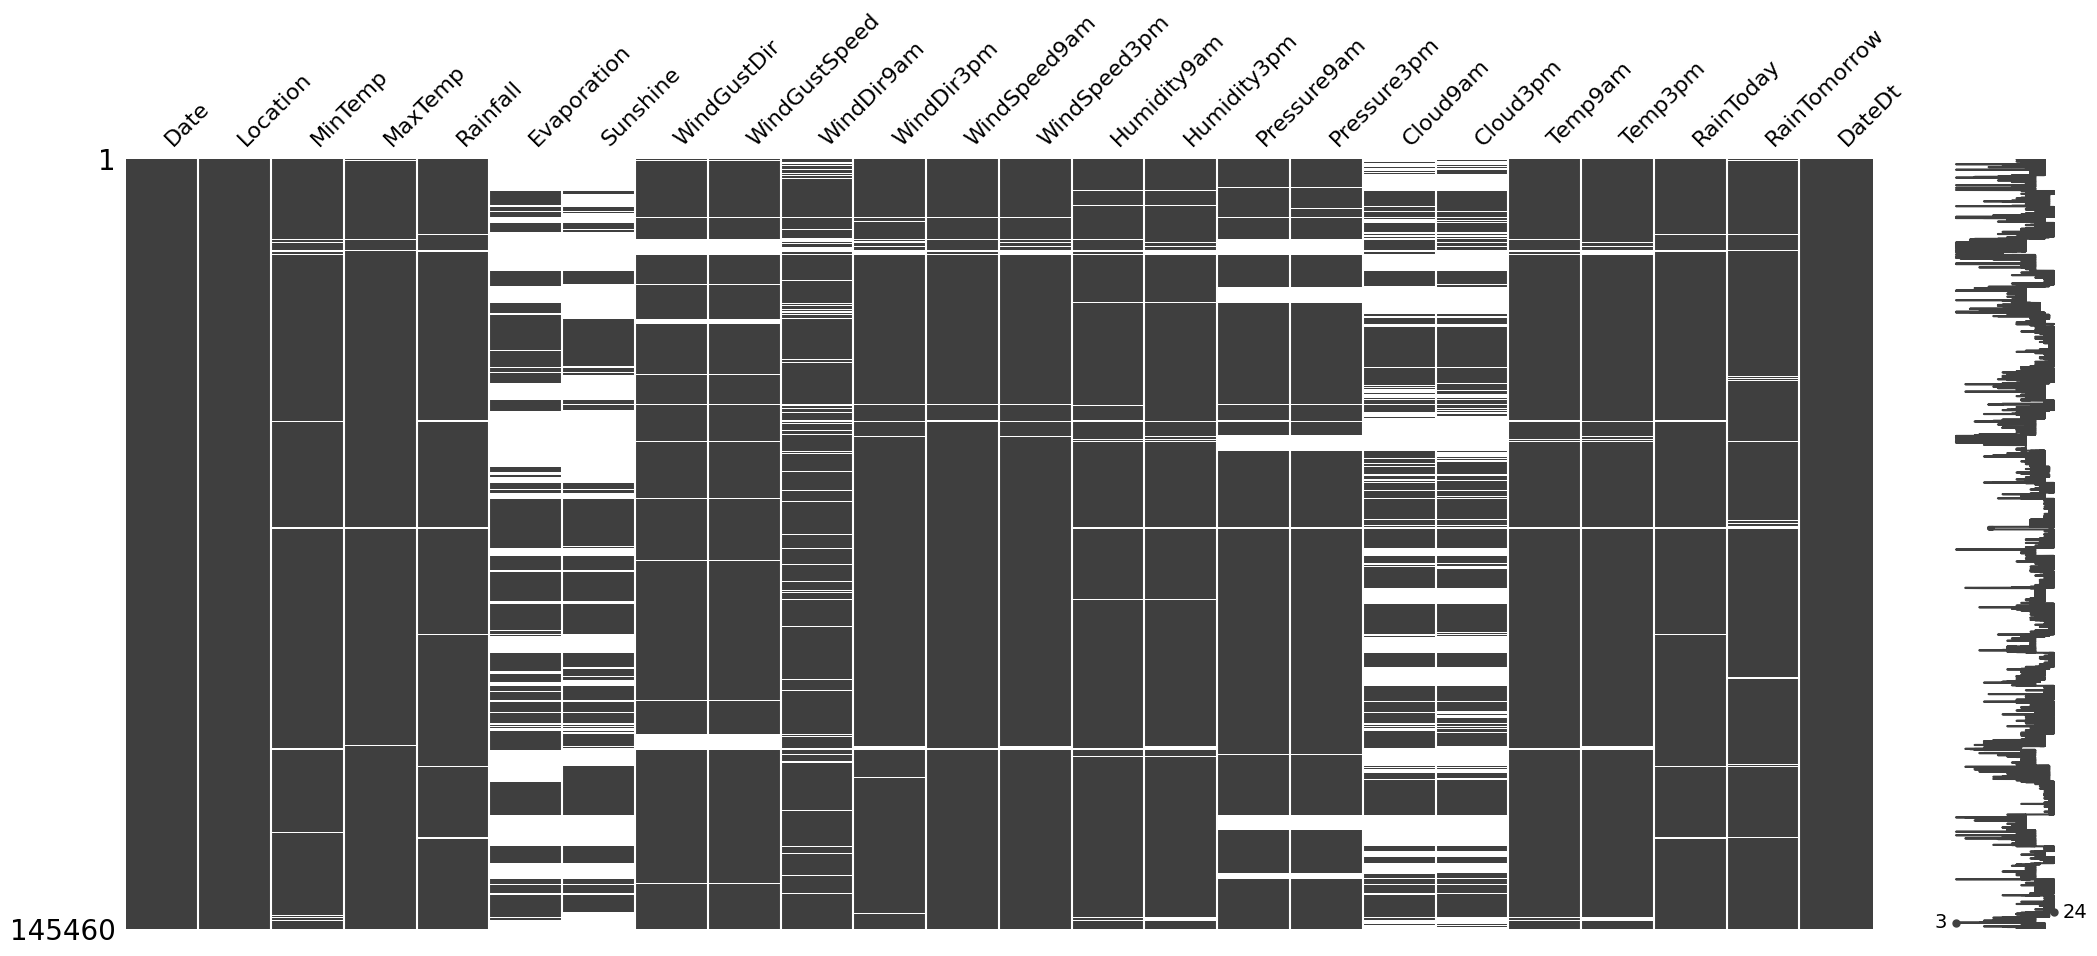

In [9]:
import missingno

missingno.matrix(df);

**Вопрос.** Как вы думаете, насколько случайны пропуски, которые вы видите выше? Как вы это поняли?

Связаны ли между собой пропуски в двух переменных или нет? На этот вопрос нам поможет ответить т. н. таблица сопряженности (или cross table):

In [10]:
# как раз тут посмотрим в каких случаях значение (nan или аргумент) в обеих колонках совпадает, а в каких разнится
# видим что в большинстве случаев есть взаимосвязь этих двух колонок (больше FalseFalse и TrueTrue)
pd.crosstab(df['Evaporation'].isna(), df['Cloud3pm'].isna())

Cloud3pm,False,True
Evaporation,,
False,69616,13054
True,16486,46304


In [11]:
# сделали то же самое, но отобразили по долям
pd.crosstab(df['Evaporation'].isna(), df['Cloud3pm'].isna(), normalize=True)

Cloud3pm,False,True
Evaporation,,
False,0.478592,0.089743
True,0.113337,0.318328


**Вопрос.** Какие выводы можно сделать?

Мы проводили проверку выше еще и затем, что ситуация потенциально могла быть, к примеру, такой: данные по солнечному освещению отсутствуют там, где есть данные оп облачности, и наоборот. В этом случае мы в теории могли бы "восстановить" пропущенные значения. Однако в нашем случае это не так, и нам остается только избавиться от тех переменных, в которых слишком много пропущенных значений, и отфильтровать наблюдения по переменным, где пропущенных значений не так много:

In [12]:
na_cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

df_filtered = df.drop(columns=na_cols).dropna(ignore_index=True)  # не забываем сбрасывать индексы
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112925 entries, 0 to 112924
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           112925 non-null  object        
 1   Location       112925 non-null  object        
 2   MinTemp        112925 non-null  float64       
 3   MaxTemp        112925 non-null  float64       
 4   Rainfall       112925 non-null  float64       
 5   WindGustDir    112925 non-null  object        
 6   WindGustSpeed  112925 non-null  float64       
 7   WindDir9am     112925 non-null  object        
 8   WindDir3pm     112925 non-null  object        
 9   WindSpeed9am   112925 non-null  float64       
 10  WindSpeed3pm   112925 non-null  float64       
 11  Humidity9am    112925 non-null  float64       
 12  Humidity3pm    112925 non-null  float64       
 13  Pressure9am    112925 non-null  float64       
 14  Pressure3pm    112925 non-null  float64       
 15  

Подведем промежуточные итоги: мы немного преобразовали данные в целом, убедились в их консистентности и решили вопрос пропущенных значений. Настало время перейти к изучению переменных по отдельности.

### Изучаем переменные по отдельности
По-хорошему, каждую переменную следует изучать отдельно. Но в нашем случае их довольно много, плюс они естественно делятся на две группы: в первую очередь на **числовые** и **категориальные**.

![](https://statsandr.com/blog/variable-types_files/variable-types-and-examples.png)

Начнем изучение с **числовых** переменных.

Они также в свою очередь образуют группы, главным образом "по смыслу". Какие это группы?

In [13]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112925 entries, 0 to 112924
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           112925 non-null  object        
 1   Location       112925 non-null  object        
 2   MinTemp        112925 non-null  float64       
 3   MaxTemp        112925 non-null  float64       
 4   Rainfall       112925 non-null  float64       
 5   WindGustDir    112925 non-null  object        
 6   WindGustSpeed  112925 non-null  float64       
 7   WindDir9am     112925 non-null  object        
 8   WindDir3pm     112925 non-null  object        
 9   WindSpeed9am   112925 non-null  float64       
 10  WindSpeed3pm   112925 non-null  float64       
 11  Humidity9am    112925 non-null  float64       
 12  Humidity3pm    112925 non-null  float64       
 13  Pressure9am    112925 non-null  float64       
 14  Pressure3pm    112925 non-null  float64       
 15  

In [14]:
numerics = df_filtered.columns[df_filtered.dtypes == float]  # отделим числовые переменные
numerics

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

Следует отметить, что нас интересует именно **распределение** каждой переменной.

**Распределение переменной** — это способ представления и анализа всех возможных значений, которые может принимать переменная, и частоты их встречаемости.

Подготовим функцию, которая поможет нам визуализировать распределение числовых переменных для более комфортного изучения. В качестве инструмента визуализации будем пользоваться подходящими для этого графиками: гистограммой и boxplot'ом, а также будем отображать среднее значение и медиану (это поможет нам оценить степень скошенности распределения).

In [15]:
def show_distribution(data, variables):
    ncols = len(variables)

    fig_length = 5 * ncols

    fig, axes = plt.subplots(2, ncols, figsize=(fig_length, fig_length // 2.5))
    
    for index, variable in enumerate(variables):
        data_variable = data[variable].dropna(ignore_index=True)
        
        variable_mean = data_variable.mean()
        variable_median = data_variable.median()
        
        ## histogram
        axes[0, index].hist(data_variable, edgecolor='black', bins=20, color='darkblue', alpha=.3)
        axes[0, index].set_title(variable)
    
        # add vertical lines for mean and median
        axes[0, index].axvline(variable_mean, color='red', label='mean')  # default linestyle is 'solid'
        axes[0, index].axvline(variable_median, color='orange', linestyle='dashed', label='median')  # for horizontal line use axhline
            # (coordinate Y)
    
        if index == 0:
            axes[0, index].set_ylabel('histogram')
    
        # add legend
        if index == ncols - 1:
            axes[0, index].legend()
    
        ## boxplot
        axes[1, index].boxplot(data_variable, vert=False)
        axes[1, index].set_yticks([])
    
        if index == 0:
            axes[1, index].set_ylabel('boxplot')

Начнем с переменных, имеющих отношение к температуре:

In [16]:
temp_vars = [name for name in numerics if 'Temp' in name]

df_filtered[temp_vars].describe().round(2)

,MinTemp,MaxTemp,Temp9am,Temp3pm
count,112925.00,112925.00,112925.00,112925.00
mean,12.66,23.66,17.46,22.13
std,6.25,6.98,6.36,6.84
min,-8.20,2.60,-3.10,1.70
25%,8.10,18.30,12.70,16.90
50%,12.40,23.10,17.10,21.60
75%,17.20,28.70,22.00,26.90
max,33.90,48.10,40.20,46.70


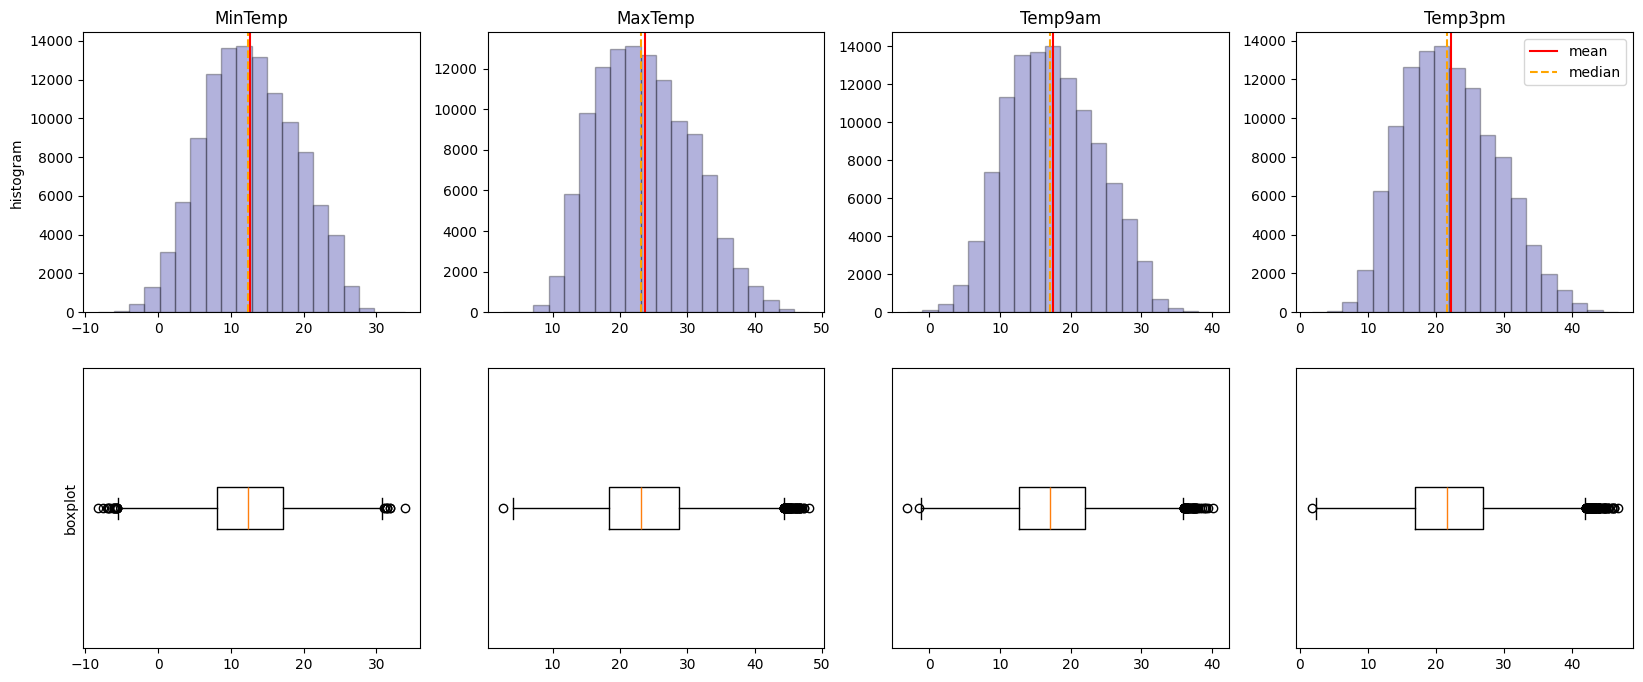

In [17]:
show_distribution(df_filtered, temp_vars)

**Вопрос.** Какие выводы можно сделать по данным графикам и метрикам?

Аналогичным образом изучите переменные, относящиеся ветру. Сделайте выводы.

In [18]:
wind_vars = [name for name in numerics if 'Speed' in name]

In [19]:
df_filtered[wind_vars].describe().round(2)

,WindGustSpeed,WindSpeed9am,WindSpeed3pm
count,112925.00,112925.00,112925.00
mean,40.79,15.18,19.50
std,13.32,8.34,8.58
min,7.00,2.00,2.00
25%,31.00,9.00,13.00
50%,39.00,13.00,19.00
75%,48.00,20.00,24.00
max,135.00,87.00,87.00


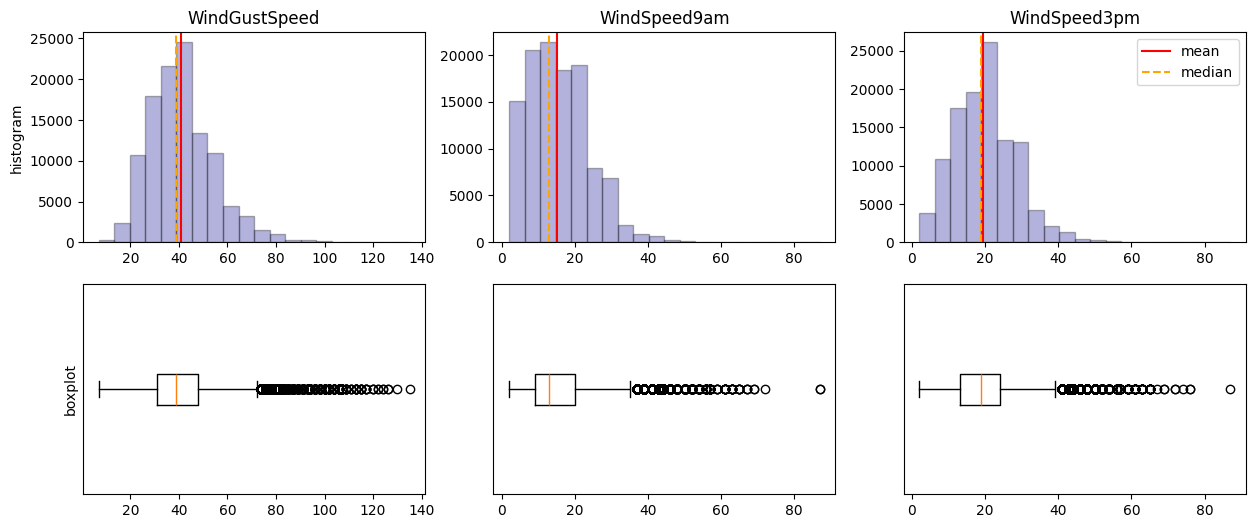

In [20]:
show_distribution(df_filtered, wind_vars)

То же самое с влажностью:

In [21]:
humid_vars = [name for name in numerics if 'Humidity' in name]

In [22]:
df_filtered[humid_vars].describe().round(2)

,Humidity9am,Humidity3pm
count,112925.00,112925.00
mean,67.40,50.67
std,18.91,20.77
min,0.00,0.00
25%,56.00,36.00
50%,68.00,51.00
75%,81.00,65.00
max,100.00,100.00


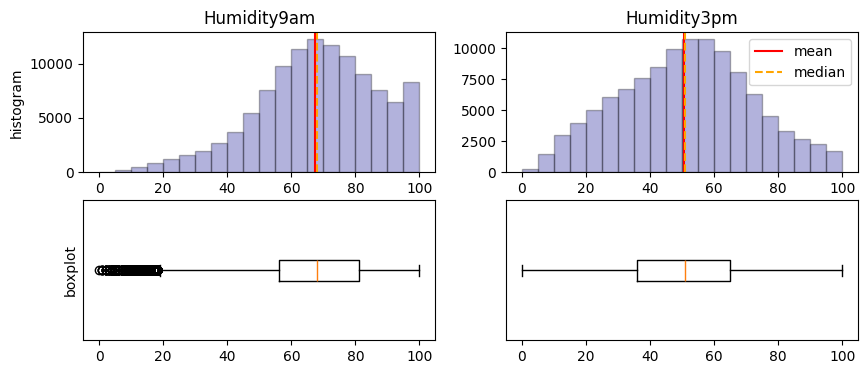

In [23]:
show_distribution(df_filtered, humid_vars)

И наконец с оставшимися:

In [24]:
df_filtered[['Pressure9am', 'Pressure3pm', 'Rainfall']].describe().round(2)

,Pressure9am,Pressure3pm,Rainfall
count,112925.00,112925.00,112925.00
mean,1017.43,1015.05,2.38
std,7.03,6.96,8.60
min,980.50,977.10,0.00
25%,1012.80,1010.30,0.00
50%,1017.40,1015.00,0.00
75%,1022.10,1019.70,0.80
max,1041.00,1039.60,367.60


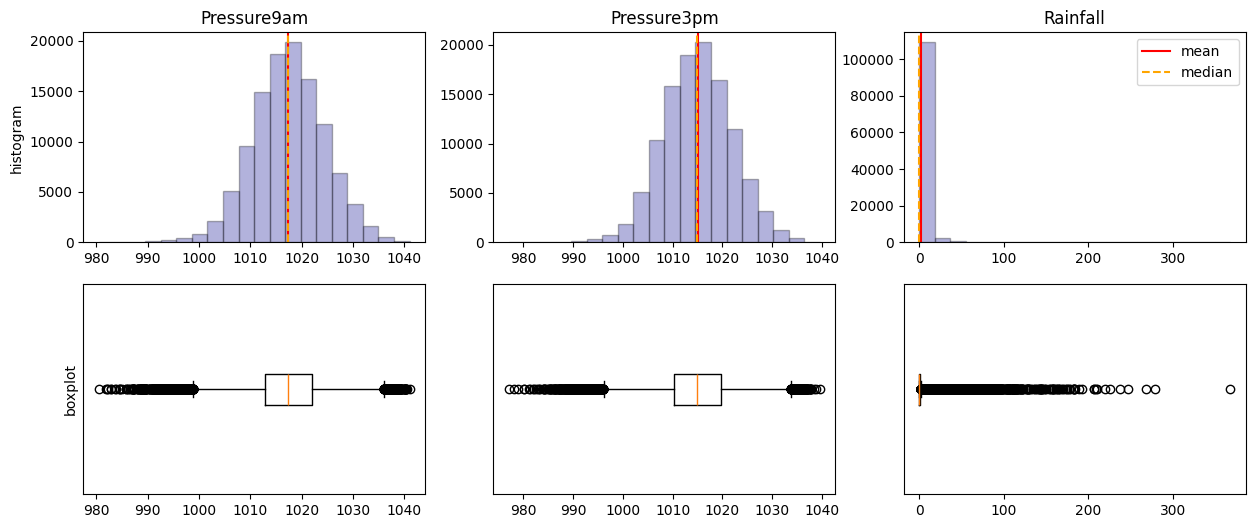

In [25]:
show_distribution(df_filtered, ['Pressure9am', 'Pressure3pm', 'Rainfall'])

Мы получили общее представление о распределении переменных. У многих из них есть выбросы, однако если они располагаются относительно симметрично, большой беды в этом нет. Также не стоит отфильтровывать выбросы, которых очень много относительно общего количества значений (т. н. длинный хвост) - это чревато потерей данных (вообще выкидывайте данные с осторожностью). Но было неплохо избавиться от выбросов в тех переменных, где:

- их немного;
- они не симметричны;
- они сильно отличаются от основной массы данных.

Для этого напишите функцию, которая:

- находит выбросы (по методу межквартильного размаха);
- считает их количество для каждой переменной, деля на левые / правые;
- считает среднюю дистанцию от левой / правой границы до выбросов.

In [26]:
def find_outliers(series: pd.Series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)

    iqr = q3 - q1

    left_limit, right_limit = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    left_outliers = series.values[series.values <= left_limit]
    right_outliers = series.values[series.values>= right_limit]

    series_std = series.std()

    left_distance = (np.abs(left_outliers - left_limit).mean()) / series_std
    right_distance = (np.abs(right_outliers - right_limit).mean()) / series_std 

    return left_outliers, right_outliers, left_distance, right_distance


def outliers_stats(data: pd.DataFrame):
    outliers_stats_df = ...

    return outliers_stats_df

In [ ]:
stats = outliers_stats(df_filtered)

In [ ]:
stats[(stats['left_count'] == 0) | (stats['right_count'] == 0)]

Отфльтровывать ничего не будем.

Перейдем от разбора числовых переменных к категориальным. Для исчерпывающего изучения распределения категориальной переменной достаточно воспользоваться т. н. **частотной таблицей** (frequency table).

In [ ]:
categoricals = df_filtered.columns[(df_filtered.dtypes != float) & ~df_filtered.columns.str.contains('Date')]
categoricals

In [ ]:
df_filtered['Location'].unique()

In [ ]:
df_filtered['Location'].value_counts()

In [ ]:
df_filtered['WindGustDir'].value_counts()

In [ ]:
df_filtered['WindDir9am'].value_counts()

### Ищем "повторяющиеся" переменные
Бывает такое, что некоторые переменные по смыслу повторяют друг друга. Как вы думаете, какие это переменные в нашем случае?

Чтобы понять это, построим матрицу корреляций.

**Что такое корреляция?**<br>
Это статистическая взаимосвязь двух или более случайных величин, при которой изменения значений одной или нескольких из этих величин сопровождаются систематическим изменением значений другой или других величин. Математическими мерами корреляции являются корреляционное отношение и коэффициент корреляции. Мы будем считать самый распространенный коэффициент корреляции - Пирсона.

![](https://highgrade.narod.ru/2instr.JPG)

In [ ]:
corr_matrix = df_filtered[numerics].corr().round(2)
corr_matrix

А вот красивая визуализация:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    cmap='coolwarm',
    linewidths=1,
    linecolor='white',
    ax=ax,
);

In [ ]:
df_filtered[temp_vars].corr().round(2)

In [ ]:
df_filtered[wind_vars].corr().round(2)

In [ ]:
df_filtered[humid_vars].corr().round(2)

In [ ]:
df_filtered[['Pressure9am', 'Pressure3pm']].corr().round(2)

Обратим внимание на то, что данные о направлении и силе ветра нуждаются в некоторой доработке. Если, к примеру, на дату T известно, что юговосточный ветер дул со скоростью 3 м/с, то остальные направления имели скорость 0 м/с. Давайте проведем соответствующее преобразование, воспользовавшись функцией `pivot_table`:

In [ ]:
def extract_index(index_tuple: tuple) -> str:
    first, second = index_tuple

    if not second:
        return first
    
    return second
    

def extend_wind_info(data: pd.DataFrame, mode: str, speed: str, index: list) -> pd.DataFrame:
    data_extended = ...

    return data_extended

In [ ]:
extend_wind_info(df_filtered, 'WindGustDir', 'WindGustSpeed', ['Date', 'Location'])

Сделаем так с каждой группой переменных, относящихся к ветру:

In [ ]:
# наш код здесь

Соединим все вместе:

In [ ]:
# наш код здесь

### Что планируем делать дальше?
А дальше планируем собственно отвечать на поставленный в начале вопрос: какова взаимосвязь между значениями погодных показателей в дату $T$ и наличием либо отсутствием осадков в дату $T+1$?

Но это уже на следующем занятии:)